# DSCI 100 Group 10: Project Report

## Group Members:
- Mohammed Samiul ISLAM SAMI, 58031451
- Narjis Alhusseini, 66272287
- Yangyi Zhu, 67642025
- Norman Wu, 24434375


# Classification of Diabetic Patients using the Concentration of Glucose, Insulin, Blood Pressure, and BMI Measurements as Predictors.


## Introduction

Diabetes Mellitus is a medical condition that impacts the way the body processes glucose, the main form of sugar which provides energy to the body. It is influenced by factors such as obesity and unhealthy diets characterized by excessive sugar intake and involves reduced insulin levels which hinder glucose absorption into cells and lead to elevated blood glucose levels, marking the onset of diabetes (CDC, 2023).

Our analysis, utilizing a Kaggle-derived dataset sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, aims to determine whether a diabetic diagnosis can be determined from multiple medical and kinesiological measurements. The dataset focuses on female patients aged 21 or older from the Pima Indian heritage. The following columns are included:

- Pregnancies (the number of pregnancies the patient had)
    - **pregnancies**
- Glucose (Plasma glucose concentration, a 2 hour oral glucose tolerance test. $mg/dL$)
    - **glucose**
- Blood Pressure (Diastolic blood pressure in $mm\,Hg$)
    - **blood_pressure**
- Skin Thickness (Triceps skin fold thickness in $mm$)
    - **skin_thickness**
- Insulin (2 Hour serum insulin in $\mu U/mL$)
    - **insulin**
- BMI (Body Mass Index in $kg/m^2$)
    - **bmi**
- Diabetes pedigree function (uncommon genetic measure of the likelihood that a patient will have diabetes based on family history)
    - **dpf**
- Age (years)
    - **age**
- Outcome (a value indicating whether or not the patient is diabetic)
    - **outcome**

Ultimately, the analysis will work towards answering the classification question: can glucose concentration, insulin levels, blood pressure, and BMI measurements determine whether an individual has diabetes? This inquiry will also investigate whether the dataset, which includes diagnosed diabetes cases, can be leveraged to diagnose whether a new, unclassified set of patient observations can be classified into the diabetic or non-diabetic class.

The four predictor variables named were chosen based on their clinical significance in diabetes diagnosis. The Mayo Clinic discusses the relationship between diabetes, insulin, and hyperglycemia: the condition which defines high levels of blood glucose (Mayo Clinic Staff, 2022).

Insulin, a hormone produced by the pancreas, regulates glucose levels in the bloodstream by facilitating its absorption and storage in tissue (Mayo Clinic Staff, 2022).

Research reveals that glucose levels below 99 mg/dL are normal, 100-125 mg/dL are pre-diabetic, and levels of 126 mg/dL or higher indicate diabetes (Mayo Clinic Staff, 2022). In order to achieve such high hyperglycemic levels, there must be a lack of insulin production in the body therefore high glucose values with low insulin values are hypothesized to classify patients as diabetic in our data model.

Additionally, Hopkins Medicine states that high blood pressure is twice as likely in individuals with diabetes (Hopkins Medicine, 2023). Our dataset includes diastolic blood pressure measurements, and we hypothesize a strong correlation between diabetic classification and pressures of 90 mm Hg or higher as per the characterization of high diastolic blood pressure used in standard patient analysis (Hopkins Medicine, 2023).

Finally, excessive sugar intake is correlated with unhealthy dietary habits leading to obesity. Klein et al. explain that obesity leads to the impaired function of beta cells: the cells which secrete insulin into the bloodstream during digestion (2022). Body Mass Index (BMI) is a kinesiological body composition measure used to determine obesity as a function of height and weight. Since our dataset is comprised of women, we hypothesize that a BMI of 30 or above will be correlated to a diabetic classification as defined by the women’s BMI classification scale (Diabetes Canada, 2023).

Due to this research-based correlation between predictor variables, we can ultimately hypothesize that hyperglycemia leading to obesity will lower the insulin levels and cause diabetes which will therefore result in high blood pressure. 

In order to decide whether these predictor variables will provide consistent results between the clinical research and our dataset, an exploratory data analysis will be performed to collect the correlational metrics between each predictor and the outcome. 

## Loading the Data from the Web and Installing/Loading Packages and Libraries

In [1]:
install.packages("kknn")      #This package is for creating the algorithm.
install.packages("GGally")    #This is for exploratory analysis
install.packages("cowplot")   #This is just for plot_grid to make our data more organised
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(repr)                 #To rescale our graphs
library(dplyr)
library(GGally)
library(cowplot)
library(kknn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ──────────────────────

In [2]:
#!!!This will have an issue if there is no data folder, fix later.

download.file("https://raw.githubusercontent.com/narjisaa/dsci-100-2023w1-group-10/main/data/diabetes.csv", "data/diabetes.csv")
diabetes_data <- read_csv("data/diabetes.csv")

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


After downloading the data, we decided to fit the column names to the tidy convention we have been seeing in DSCI100; all lowercase letters and underscores for spaces. the `outcome` column is a `dbl` right now and that does not have too much sense. So we have decided to change that into `chr` in order to change the data into a factor with more meaning data values rather than just 1's and 0's.

In [3]:
colnames(diabetes_data) <- c("pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "dpf", "age", "outcome")

# Casted outcame into chr to change names
class(diabetes_data$outcome) = "chr"
head(diabetes_data)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,dpf,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


We now will change all 0's into NA where it doesn't make sense. All the columns aside from pregnancies (and the response column) use 0 instead of NA for missing data, so we will be fixing that so we can just use `na.omit` later.

In [4]:
# Replace all 0 with NA
diabetes_data$glucose[diabetes_data$glucose == 0] <- NA
diabetes_data$skin_thickness[diabetes_data$skin_thickness == 0] <- NA
diabetes_data$insulin[diabetes_data$insulin == 0] <- NA
diabetes_data$bmi[diabetes_data$bmi == 0] <- NA
diabetes_data$dpf[diabetes_data$dpf == 0] <- NA
diabetes_data$age[diabetes_data$age == 0] <- NA


Now, in the outcome column we can adjust the column to containing only non-diabetic and diabetic instead of 0's and 1's and then change the column to be a factor as well as just selecting our predictors and response `glucose`, `insulin`, `bmi`, `blood_pressure` and `outcome` and finally to remove all the NA values from the data frame. We will now save this data frame into `DIABETES_DATA` and this will represent the base data frame we will be using through this project.

In [5]:
# Change all 0 to non-diabetic and all 1 to diabetic
diabetes_data$outcome[diabetes_data$outcome == 0] <- "non-diabetic"
diabetes_data$outcome[diabetes_data$outcome == 1] <- "diabetic"

# Casting outcome into factor, selecting relevant data and then removing all NA values.
DIABETES_DATA <- diabetes_data |>
                 mutate(outcome = as.factor(outcome)) |>
                 select(glucose, insulin, bmi, blood_pressure, outcome) |>
                 na.omit()

head(DIABETES_DATA) #~~~THIS IS THE MAIN DATASET TO BE USED, DO NOT REASSIGN.

glucose,insulin,bmi,blood_pressure,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
89,94,28.1,66,non-diabetic
137,168,43.1,40,diabetic
78,88,31.0,50,diabetic
197,543,30.5,70,diabetic
189,846,30.1,60,diabetic
166,175,25.8,72,diabetic


## Exploratory Summaries and Figures

In [6]:
diabetes_mean0 <- DIABETES_DATA |>
                 filter(outcome == "non-diabetic") |>
                 map_df(mean, na.rm = TRUE) |>
                 mutate(outcome = "non-diabetic")
diabetes_mean1 <- DIABETES_DATA |>
                 filter(outcome == "diabetic") |>
                 map_df(mean, na.rm = TRUE) |>
                 mutate(outcome = "diabetic")
diabetes_means <- diabetes_mean0 |>
                  add_row(diabetes_mean1)
diabetes_means

Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(.x[[i]], ...):
“argument is not numeric or logical: returning NA”


glucose,insulin,bmi,blood_pressure,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
111.4313,130.8550,31.75076,68.96947,non-diabetic
145.1923,206.8462,35.77769,74.07692,diabetic


Separating the data into non-diabetic and diabetic and then finding the means. We can figure out values that might be good as a predictor early on. We can see that glucose and insulin have a large difference between the non-diabetic and diabetic.

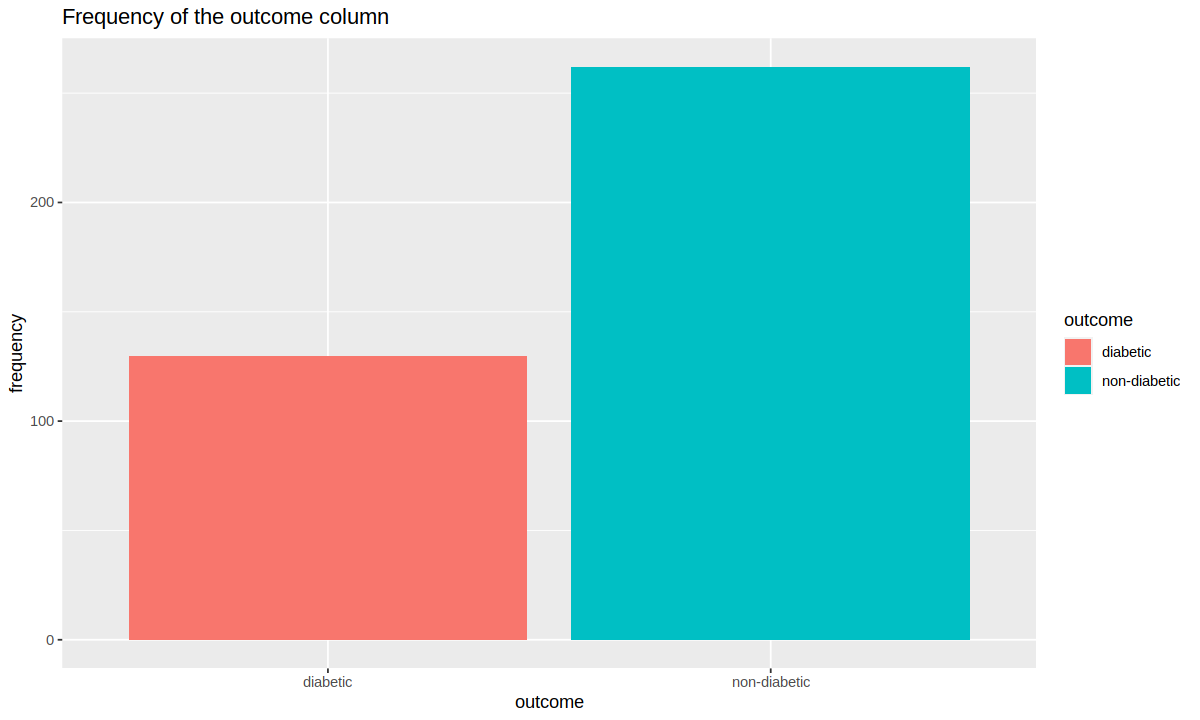

In [7]:
options(repr.plot.height = 6, repr.plot.width = 10)
outcome_bar <- ggplot(DIABETES_DATA, aes(outcome, fill = outcome)) +
        geom_bar() +
        labs(title = "Frequency of the outcome column", y = "frequency")
        
outcome_bar

This bar plot is to see if there will be an overbidding affect for certain values of K. Seeing the results if we have a low K of around 3 to low 20's there shouldn't be an over bidding affect. Anything higher than that we can expect to see a overbidding affect and might have to adjust the recipe to account for that.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


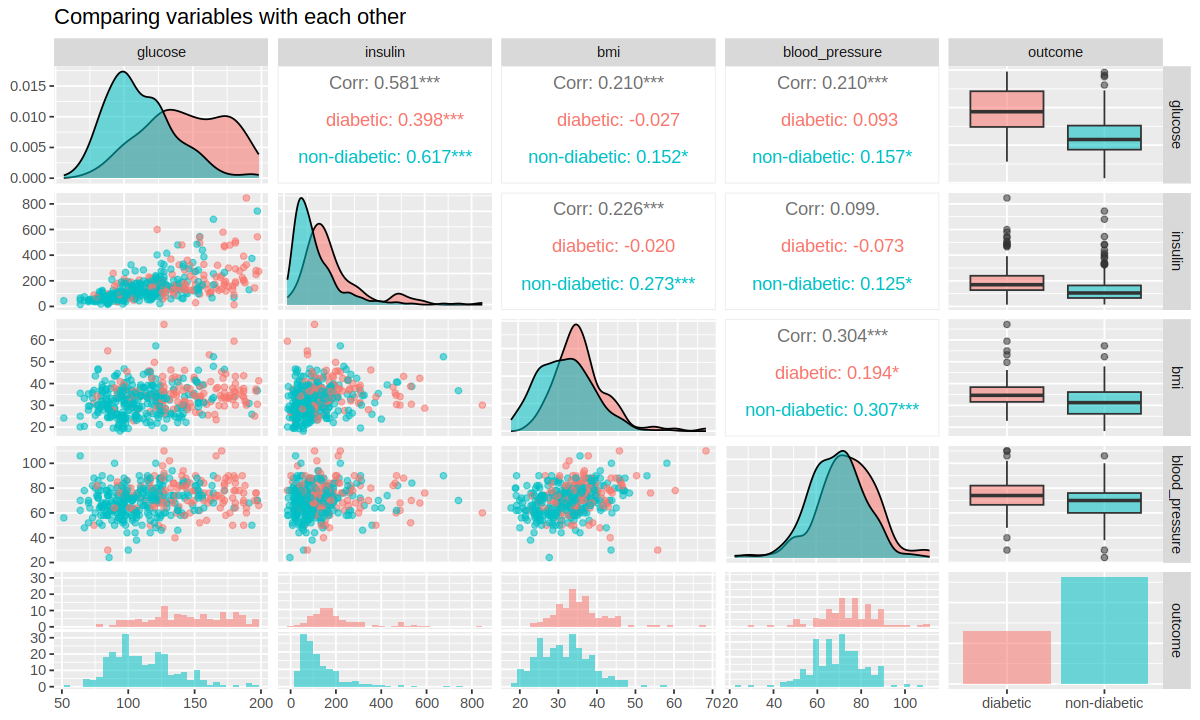

In [8]:
plot_matrix <- ggpairs(DIABETES_DATA,
                      mapping=ggplot2::aes(colour = outcome, alpha=0.5)) +
               ggtitle("Comparing variables with each other")
plot_matrix

Here we use `ggpairs` to reconfirm our predictors and quickly justify our predictor picks. We can see that `glucose` clearly has an effect on the outcome of whether a patient is diabetic or not. `insulin` also has an effect although the outcome clusters are less differentiated than in `glucose`. Looking at the `bmi` and `insulin` graph we can see that the diabetic population is slight towards to the top-right. Similarly, the `bmi` and `blood_pressure` plot also have similar pattern where the diabetic population is more towards the top-right. For, these following reasons (and the reasons stated in the introduction) we will be using `bmi`, `blood_pressure`, `glucose` and `insulin` as our predictors.

## Data Analysis

In [9]:
set.seed(1213)
#spliting the DIABETES_DATA
diabetes_split <- initial_split(DIABETES_DATA, prop = 0.80, strata = outcome)
diabetes_test <- testing(diabetes_split)
diabetes_train <- training(diabetes_split)

We are now splitting our data into training and testing sets, 80% for the training and 20% for the testing.

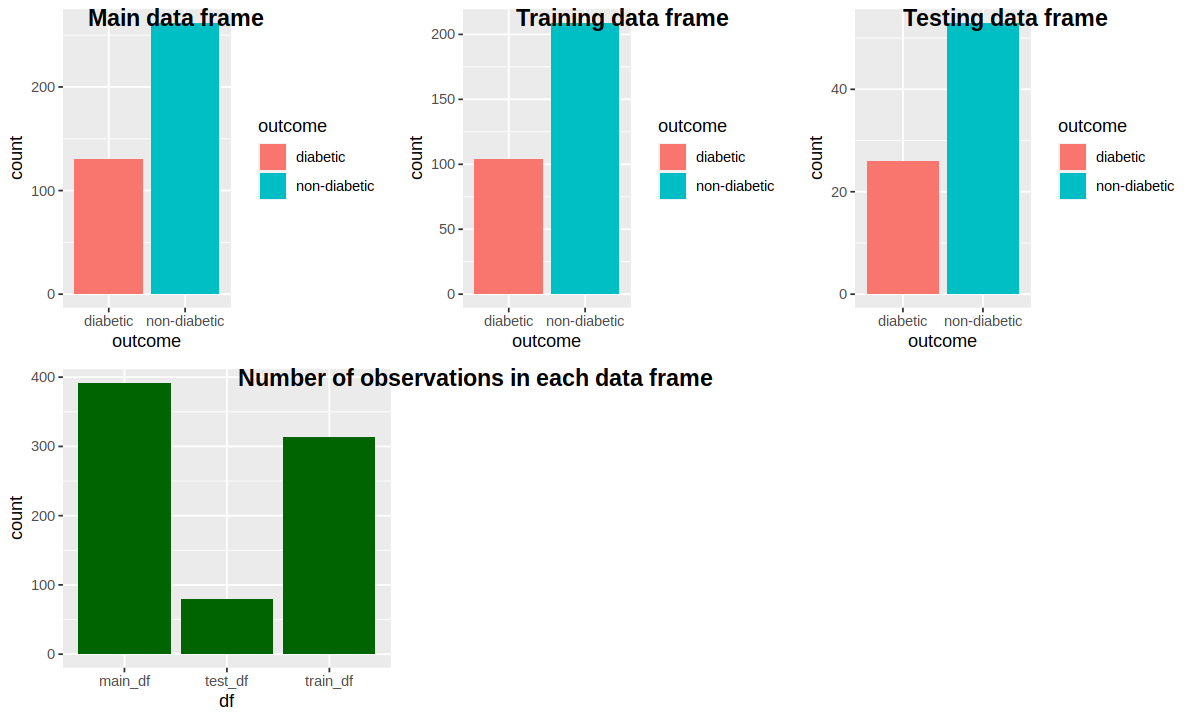

In [10]:
options(repr.plot.height = 6, repr.plot.width = 10)
bars1 <- ggplot(DIABETES_DATA, aes(outcome, fill = outcome)) +
        geom_bar()
bars2 <- ggplot(diabetes_train, aes(outcome, fill = outcome)) +
        geom_bar()
bars3 <- ggplot(diabetes_test, aes(outcome, fill = outcome)) +
        geom_bar()
bar4_tibble <- tibble(df = c("main_df", "train_df", "test_df"), count = c(nrow(DIABETES_DATA), nrow(diabetes_train), nrow(diabetes_test)))
bar4 <- ggplot(bar4_tibble, aes(x = df, y = count)) +
        geom_bar(stat = "identity", fill = "darkgreen")
bars <- plot_grid(bars1, bars2, bars3, bar4, ncol=3, 
                  labels = c("Main data frame"," Training data frame","Testing data frame","Number of observations in each data frame"))
bars

This is just to show that our data is maintaining those proportions and that the test data frame has around 70 observations and the training data frame has around 330.

In [11]:
diabetes_recipe<-recipe(outcome ~ glucose+bmi+blood_pressure+insulin, data = diabetes_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())
diabetes_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

This is our recipe using 4 predictors and scaling and centering all the predictors. We did not use `step_upsample` since we believe our K value will be small enough that there will be no overbidding and therefore we will not the predicting the majority.

In [15]:
#V-folds(15 times)
diabetes_vfold <- vfold_cv(diabetes_train, v =15, strata = outcome)
#K_vals(try neighbors from 1 to 30)
k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))
#knn_spec_tune to decide which K value we should use
knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

We have used 15 folds and trying neighbors from 1 to 30. 

In [17]:
knn_results <- workflow() |>
                 add_recipe(diabetes_recipe) |>
                 add_model(knn_spec_tune) |>
                 tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                 collect_metrics()
accuracies <- knn_results |>
  filter(.metric == "accuracy")
head(accuracies)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6970760,15,0.03143851,Preprocessor1_Model01
2,accuracy,binary,0.6970760,15,0.03143851,Preprocessor1_Model02
3,accuracy,binary,0.7196324,15,0.02545682,Preprocessor1_Model03
4,accuracy,binary,0.7196324,15,0.02545682,Preprocessor1_Model04
5,accuracy,binary,0.7485380,15,0.02741406,Preprocessor1_Model05
6,accuracy,binary,0.7485380,15,0.02741406,Preprocessor1_Model06
7,accuracy,binary,0.7774436,15,0.02599323,Preprocessor1_Model07
8,accuracy,binary,0.7774436,15,0.02599323,Preprocessor1_Model08
9,accuracy,binary,0.7742690,15,0.02632058,Preprocessor1_Model09


This is now just simple workflow, adding the recipe, adding the model, finding the best K according to the training data. Then we get the metrics to be able to graph it to find a suitable K to use.

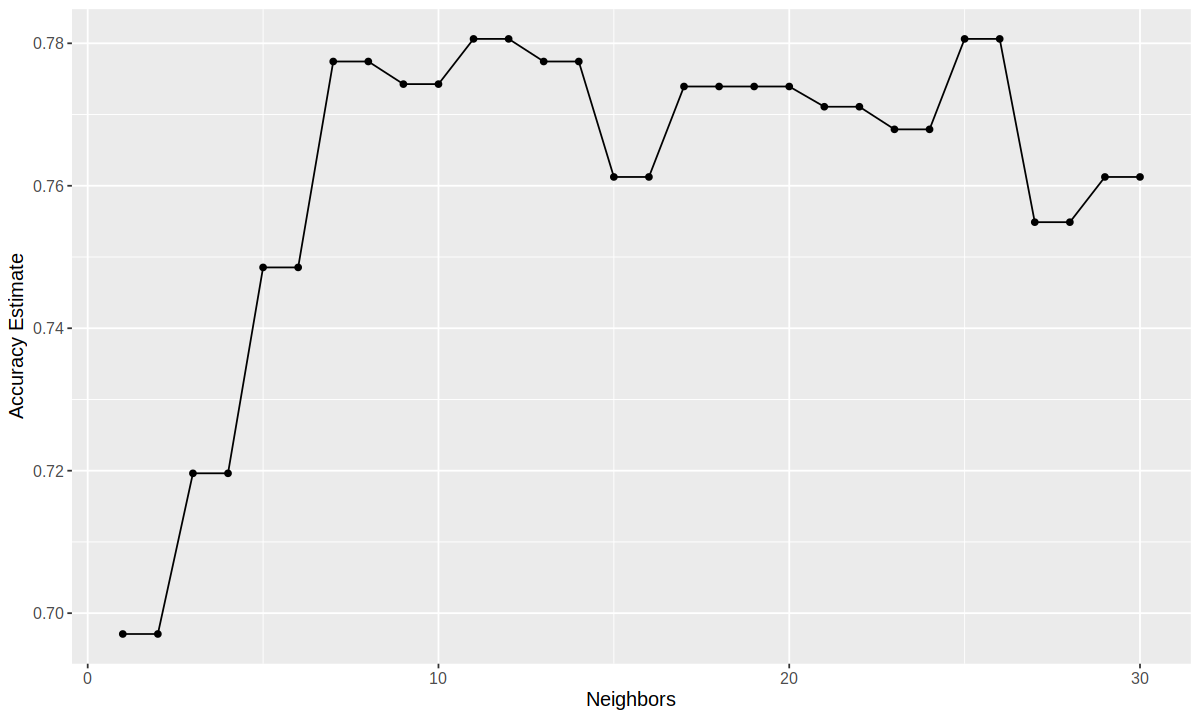

In [18]:
#select K values
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))
accuracy_vs_k

Here, we have decided to try 6 neighbors since if we used 15 we would get a low accuracy score with the test data frame since that is a very K compared to the number of observations in that data frame. 6 neighbors also has a very high accuracy estimate.

In [94]:
#Knn_ spec with the found K value(stil deciding)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
            set_engine("kknn") |>
            set_mode("classification")
#fit the recipe and knn_spec
knn_fit<-workflow() |>
             add_recipe(diabetes_recipe) |>
             add_model(knn_spec) |>
             fit(data = diabetes_train)
#predict
diabetes_test_predictions <- predict(knn_fit, diabetes_test) |>
                          bind_cols(diabetes_test)
head(diabetes_test_predictions)
#accuracy
diabetes_prediction_accuracy <- diabetes_test_predictions |>
                        metrics(truth = outcome, estimate = .pred_class)|>
                        filter(.metric == "accuracy")
pull(diabetes_prediction_accuracy, .estimate)

.pred_class,glucose,insulin,bmi,blood_pressure,outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
non-diabetic,89,94,28.1,66,non-diabetic
non-diabetic,137,168,43.1,40,diabetic
diabetic,197,543,30.5,70,diabetic
non-diabetic,97,140,23.2,66,non-diabetic
diabetic,158,245,31.6,76,diabetic
diabetic,176,300,33.7,90,diabetic


[1] 0.7721519

After, using 6 neighbors and trying to predict the test data frame, the prediction shows a promising accuracy of 77.2%.

# **TO DO LIST FOR DISCUSSION** (???) (700 words)
## - Summary
## - Expectations (hypothesis), impact of the finding (application to irl) and future question


# **THINGS TO KEEP IN MIND**
#### - Use set.seed()
#### - Lack of explanation for the predictor variables
#### - Visuals do not have titles or labels
#### - All figures and tables should have table/figure number and legend (when applicable)
#### - Our reasoning is off, we need to improve our reasoning

# References 

Centers for Disease Control and Prevention [CDC]. (2023). What is Diabetes? *cdc.gov*. https://www.cdc.gov/diabetes/basics/diabetes.htmlOur

Diabetes Canada. Body Mass Index (BMI) Calculator. (December 2023). *diabetes.ca*. https://www.diabetes.ca/resources/tools---resources/body-mass-index-(bmi)-calculator

Hopkins Medicine. Diabetes and High Blood Pressure. (2023) *The Johns Hopkins University*. https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure

Klein S, Gastaldelli A, Yki-Järvinen H, Scherer PE (January 2022). Why does obesity cause diabetes? *Cell Metabolism*. 34(1):11-20. https://www.cell.com/cell-metabolism/fulltext/S1550-4131(21)00631-8?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS1550413121006318%3Fshowall%3Dtrue

Mayo Clinic Staff. Hyperglycemia and diabetes. (August 2022). *mayoclinic.org*. https://www.mayoclinic.org/diseases-conditions/hyperglycemia/symptoms-causes/syc-20373631

UCI Machine Learning (2016). Pima Indians Diabetes Database. *kaggle*. https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv